In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Input, BatchNormalization, Concatenate, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
mainDIR = os.listdir('./chest_xray')
print(mainDIR)
train_folder= './chest_xray/train/'
val_folder = './chest_xray/val/'
test_folder = './chest_xray/test/'
# train
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'
#Normal pic
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)
norm_pic_address = train_n+norm_pic
#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))
sic_pic = os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

['test', 'train', 'chest_xray', '__MACOSX', 'val']
1341
normal picture title:  NORMAL2-IM-0690-0001.jpeg
pneumonia picture title: person325_virus_659.jpeg


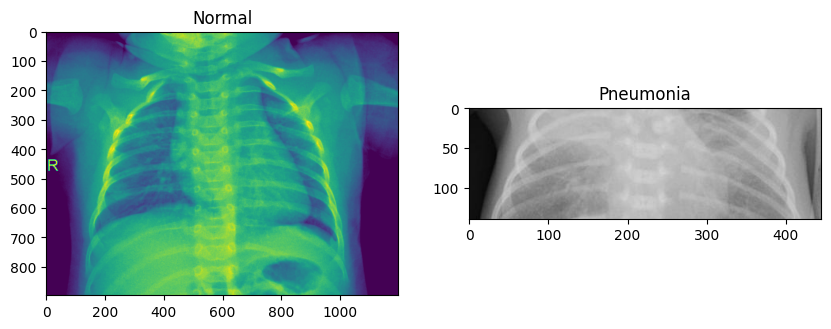

In [8]:
# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')
plt.show()
# let's build the CNN model

In [9]:
#cnn = Sequential()
#Convolution
model_in = Input(shape = (64, 64, 3))
model = Flatten()(model_in)

# Fully Connected Layers
model = Dense(activation = 'relu', units = 128) (model)
model = Dense(activation = 'sigmoid', units = 1)(model)

# Compile the Neural network
model_fin = Model(inputs=model_in, outputs=model)
model_fin.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
num_of_test_samples = 600
batch_size = 32

# Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image

train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

#Image normalization.
training_set = train_datagen.flow_from_directory('./chest_xray/train', target_size = (64, 64), 
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [11]:
validation_generator = test_datagen.flow_from_directory('./chest_xray/val/', 
                                                        target_size=(64, 64), 
                                                        batch_size=32,
                                                        class_mode='binary')
test_set = test_datagen.flow_from_directory('./chest_xray/test', 
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')
model_fin.summary()

Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,572,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,573,121 (6.00 MB)

 Trainable params: 1,573,121 (6.00 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
cnn_model = model_fin.fit(training_set,
                          steps_per_epoch = 163,
                          epochs = 10,
                          validation_data = validation_generator,
                          validation_steps = 624)

test_accu = model_fin.evaluate(test_set,steps=624)

model_fin.save('medical_ann.h5')

Epoch 1/10


/home/ubuntu/workdir/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 24s 141ms/step - accuracy: 0.7658 - loss: 0.9701 - val_accuracy: 0.8125 - val_loss: 0.4572
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.4572
Epoch 3/10


2024-05-29 16:13:55.618229: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-05-29 16:13:55.627327: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:13:55.710614: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 23s 138ms/step - accuracy: 0.8707 - loss: 0.3043 - val_accuracy: 0.5625 - val_loss: 1.6348
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5625 - val_loss: 1.6348
Epoch 5/10


2024-05-29 16:14:19.091271: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:14:19.097475: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:14:19.174645: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 23s 133ms/step - accuracy: 0.8423 - loss: 0.4017 - val_accuracy: 0.8750 - val_loss: 0.4082
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.4082
Epoch 7/10


2024-05-29 16:14:41.821855: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:14:41.828308: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:14:41.906824: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 23s 136ms/step - accuracy: 0.8866 - loss: 0.2780 - val_accuracy: 0.6250 - val_loss: 0.6905
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.6905
Epoch 9/10


2024-05-29 16:15:05.007867: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:15:05.014776: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:15:05.093854: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 24s 142ms/step - accuracy: 0.8787 - loss: 0.2833 - val_accuracy: 0.7500 - val_loss: 0.3960
Epoch 10/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.3960


2024-05-29 16:15:29.379873: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:15:29.385600: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:15:29.463379: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8401 - loss: 0.3433  


2024-05-29 16:15:31.663368: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


The testing accuracy is : 83.97436141967773 %
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step


0

In [12]:
print('The testing accuracy is :',test_accu[1]*100, '%')
Y_pred = model_fin.predict(test_set, 100)
y_pred = np.argmax(Y_pred, axis=1)
max(y_pred)

NameError: name 'test_accu' is not defined

In [22]:
# label 얻기 
labels = test_set.labels

Y_pred = model_fin.predict(test_set)
#y_pred = np.argmax(Y_pred)
y_pred = []
for yy in Y_pred:
    if yy >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
class_name = ["NORMAL", "PNEUMONIA"]
print("actual || predict")
for i in range(624):
    if i%10 == 0:
        print(class_name[labels[i]], end=" || ")
        print(class_name[y_pred[i]], end='\n')

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step 
actual || predict
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
P

In [21]:
# 예측
Y_pred = model_fin.predict(test_set, steps=624)
y_pred = np.argmax(Y_pred, axis=1)

# 성능 평가
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())

print(classification_report(true_classes, y_pred, target_names=class_labels))
print(confusion_matrix(true_classes, y_pred))

# 저장된 모델을 로드하여 예측
loaded_model = tf.keras.models.load_model('medical_ann.h5')

# 새로운 데이터셋에 대한 예측
new_predictions = loaded_model.predict(test_set, steps=624)
new_y_pred = np.argmax(new_predictions, axis=1)

# 새로운 예측 결과 출력
print(classification_report(true_classes, new_y_pred, target_names=class_labels))
print(confusion_matrix(true_classes, new_y_pred))

624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step  


2024-05-29 16:44:47.636068: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
/home/ubuntu/workdir/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/workdir/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samp

              precision    recall  f1-score   support

      NORMAL       0.38      1.00      0.55       234
   PNEUMONIA       0.00      0.00      0.00       390

    accuracy                           0.38       624
   macro avg       0.19      0.50      0.27       624
weighted avg       0.14      0.38      0.20       624

[[234   0]
 [390   0]]
624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step    
              precision    recall  f1-score   support

      NORMAL       0.38      1.00      0.55       234
   PNEUMONIA       0.00      0.00      0.00       390

    accuracy                           0.38       624
   macro avg       0.19      0.50      0.27       624
weighted avg       0.14      0.38      0.20       624

[[234   0]
 [390   0]]


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-05-29 16:44:49.901950: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
/home/ubuntu/workdir/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/workdir/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samp

In [19]:
# Accuracy
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.savefig('train_accuracy.png')
plt.show(block=False)
plt.clf()

# Loss
plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.savefig('train_loss.png')
plt.show(block=False)
plt.clf()

NameError: name 'cnn_model' is not defined